## 1. Climate data visualisation and manipulation in Python
Pedro Herrera Lormendez (pedrolormendez@gmail.com) and Conrad Jackisch (conrad.jackisch@tbt.tu-freiberg.de)

This is the first intro step to get started with netCDF data in Python. We will use the xarray library to read and visualise climate data.

### XArray
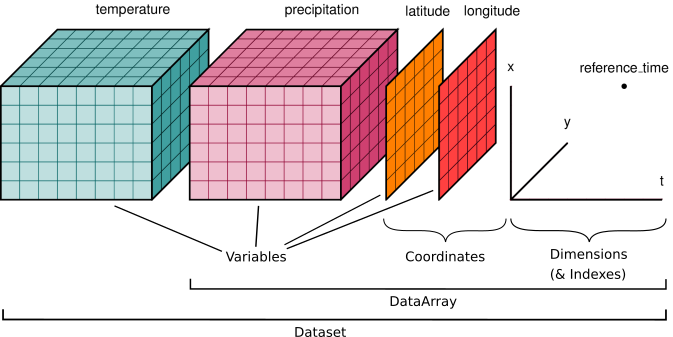
* __XArray__ is focused on N-dimensional arrays of data and its interface is based largely on the netCDF data model (variables, attributes, and dimensions).
*The __DataArray__ is one of the basic building blocks of XArray.


Quick visualisation in the standalone app [Panoply](https://www.giss.nasa.gov/tools/panoply/download/). Open the "sample.nc" sample dataset. Let's explore!
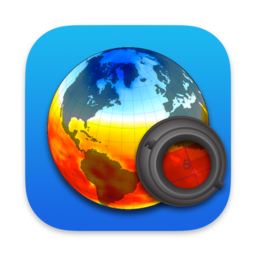

In [11]:
# importing numpy and xarray
import numpy as np
import xarray as xr
# Other needed tools
import sys
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
# Assuming your Jupyter notebook is in the 'notebooks' directory
sys.path.append(os.path.abspath('../help_code'))
import tools

#### Reading and visualising a netCDF

In [3]:
# Definging the file path
file_path = '../data/sample.nc'
# Reading the netcdf file using xarray
DS = xr.open_dataset(file_path)
# Fixing the longitude coordinates
DS = tools.convert_and_sort_coords(DS)
DS

<xarray.Dataset> Size: 19MB
Dimensions:  (time: 96, lat: 90, lon: 180)
Coordinates:
  * time     (time) datetime64[ns] 768B 2022-07-17 ... 2022-07-20T23:00:00
  * lon      (lon) float64 1kB -178.0 -176.0 -174.0 -172.0 ... 176.0 178.0 180.0
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
Data variables:
    t2m      (time, lat, lon) float32 6MB ...
    msl      (time, lat, lon) float32 6MB ...
    tp       (time, lat, lon) float32 6MB ...
Attributes:
    CDI:          Climate Data Interface version 2.3.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Dec 10 22:01:24 2023: cdo remapbil,r180x90 sample_ERA5....
    CDO:          Climate Data Operators version 2.3.0 (https://mpimet.mpg.de...

In [4]:
# Extracting one variable DS.var_name
# Extracting the two metre temperature variable (t2m)
t2m = DS.t2m
t2m

<xarray.DataArray 't2m' (time: 96, lat: 90, lon: 180)> Size: 6MB
[1555200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 768B 2022-07-17 ... 2022-07-20T23:00:00
  * lon      (lon) float64 1kB -178.0 -176.0 -174.0 -172.0 ... 176.0 178.0 180.0
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
Attributes:
    long_name:  2 metre temperature
    units:      K

In [5]:
# Checking the time coordinate values
t2m.time

<xarray.DataArray 'time' (time: 96)> Size: 768B
array(['2022-07-17T00:00:00.000000000', '2022-07-17T01:00:00.000000000',
       '2022-07-17T02:00:00.000000000', '2022-07-17T03:00:00.000000000',
       '2022-07-17T04:00:00.000000000', '2022-07-17T05:00:00.000000000',
       '2022-07-17T06:00:00.000000000', '2022-07-17T07:00:00.000000000',
       '2022-07-17T08:00:00.000000000', '2022-07-17T09:00:00.000000000',
       '2022-07-17T10:00:00.000000000', '2022-07-17T11:00:00.000000000',
       '2022-07-17T12:00:00.000000000', '2022-07-17T13:00:00.000000000',
       '2022-07-17T14:00:00.000000000', '2022-07-17T15:00:00.000000000',
       '2022-07-17T16:00:00.000000000', '2022-07-17T17:00:00.000000000',
       '2022-07-17T18:00:00.000000000', '2022-07-17T19:00:00.000000000',
       '2022-07-17T20:00:00.000000000', '2022-07-17T21:00:00.000000000',
       '2022-07-17T22:00:00.000000000', '2022-07-17T23:00:00.000000000',
       '2022-07-18T00:00:00.000000000', '2022-07-18T01:00:00.000000000',
       '2022-07-18T02:00:00.000000000', '2022-07-18T03:00:00.000000000',
       '2022-07-18T04:00:00.000000000', '2022-07-18T05:00:00.000000000',
       '2022-07-18T06:00:00.000000000', '2022-07-18T07:00:00.000000000',
       '2022-07-18T08:00:00.000000000', '2022-07-18T09:00:00.000000000',
       '2022-07-18T10:00:00.000000000', '2022-07-18T11:00:00.000000000',
       '2022-07-18T12:00:00.000000000', '2022-07-18T13:00:00.000000000',
       '2022-07-18T14:00:00.000000000', '2022-07-18T15:00:00.000000000',
       '2022-07-18T16:00:00.000000000', '2022-07-18T17:00:00.000000000',
       '2022-07-18T18:00:00.000000000', '2022-07-18T19:00:00.000000000',
       '2022-07-18T20:00:00.000000000', '2022-07-18T21:00:00.000000000',
       '2022-07-18T22:00:00.000000000', '2022-07-18T23:00:00.000000000',
       '2022-07-19T00:00:00.000000000', '2022-07-19T01:00:00.000000000',
       '2022-07-19T02:00:00.000000000', '2022-07-19T03:00:00.000000000',
       '2022-07-19T04:00:00.000000000', '2022-07-19T05:00:00.000000000',
       '2022-07-19T06:00:00.000000000', '2022-07-19T07:00:00.000000000',
       '2022-07-19T08:00:00.000000000', '2022-07-19T09:00:00.000000000',
       '2022-07-19T10:00:00.000000000', '2022-07-19T11:00:00.000000000',
       '2022-07-19T12:00:00.000000000', '2022-07-19T13:00:00.000000000',
       '2022-07-19T14:00:00.000000000', '2022-07-19T15:00:00.000000000',
       '2022-07-19T16:00:00.000000000', '2022-07-19T17:00:00.000000000',
       '2022-07-19T18:00:00.000000000', '2022-07-19T19:00:00.000000000',
       '2022-07-19T20:00:00.000000000', '2022-07-19T21:00:00.000000000',
       '2022-07-19T22:00:00.000000000', '2022-07-19T23:00:00.000000000',
       '2022-07-20T00:00:00.000000000', '2022-07-20T01:00:00.000000000',
       '2022-07-20T02:00:00.000000000', '2022-07-20T03:00:00.000000000',
       '2022-07-20T04:00:00.000000000', '2022-07-20T05:00:00.000000000',
       '2022-07-20T06:00:00.000000000', '2022-07-20T07:00:00.000000000',
       '2022-07-20T08:00:00.000000000', '2022-07-20T09:00:00.000000000',
       '2022-07-20T10:00:00.000000000', '2022-07-20T11:00:00.000000000',
       '2022-07-20T12:00:00.000000000', '2022-07-20T13:00:00.000000000',
       '2022-07-20T14:00:00.000000000', '2022-07-20T15:00:00.000000000',
       '2022-07-20T16:00:00.000000000', '2022-07-20T17:00:00.000000000',
       '2022-07-20T18:00:00.000000000', '2022-07-20T19:00:00.000000000',
       '2022-07-20T20:00:00.000000000', '2022-07-20T21:00:00.000000000',
       '2022-07-20T22:00:00.000000000', '2022-07-20T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 768B 2022-07-17 ... 2022-07-20T23:00:00
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [6]:
# Convert t2m to ºC
t2m = t2m - 273.15

In [7]:
# Checking the minimum and maximum values
print(f"The minimum temperature is {t2m.min().values}")
print(f"The minimum temperature is {t2m.max().values}")

The minimum temperature is -71.3126220703125
The minimum temperature is 50.6756591796875


('time', 'lat', 'lon')


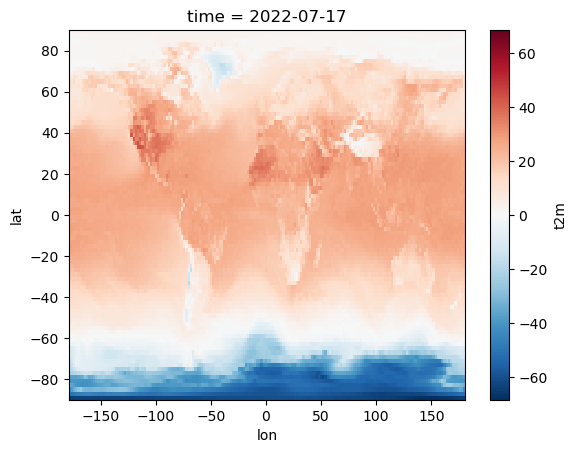

In [8]:
# Quickly visualising the data
# priting the dimensions of the data
print(t2m.dims)
# Accessing the first time dimension [0,:,:] 0 for first dimension and -1 for the last
t2m[0].plot()

Analysing the extreme temperature event on the 19-07-2022
- Extracting the data on the time point of interest 19-07-2022 15:00

In [9]:
# Extreme temperature on the 19-07 15:00 hrs
# time '2022-07-19T15:00:00.000000000'
t2m_20220719 = t2m.sel(time = '2022-07-19T15:00:00.000000000')
t2m_20220719

<xarray.DataArray 't2m' (lat: 90, lon: 180)> Size: 65kB
array([[-5.5538086e+01, -5.5515625e+01, -5.5489410e+01, ...,
        -5.5554932e+01, -5.5556808e+01, -5.5554932e+01],
       [-4.6307724e+01, -4.5598267e+01, -4.4795227e+01, ...,
        -4.7181900e+01, -4.6957275e+01, -4.6625946e+01],
       [-3.9776642e+01, -3.7590271e+01, -3.3032181e+01, ...,
        -4.1766479e+01, -4.2047272e+01, -3.9568863e+01],
       ...,
       [-1.6900635e-01, -3.4240723e-02,  1.4544678e-01, ...,
        -3.5058594e-01, -3.1127930e-01, -2.4765015e-01],
       [ 7.5009155e-01,  7.7816772e-01,  8.0624390e-01, ...,
         6.7520142e-01,  7.0141602e-01,  7.2763062e-01],
       [ 1.2105713e+00,  1.2143250e+00,  1.2180481e+00, ...,
         1.2218018e+00,  1.2143250e+00,  1.2068176e+00]], dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2022-07-19T15:00:00
  * lon      (lon) float64 1kB -178.0 -176.0 -174.0 -172.0 ... 176.0 178.0 180.0
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0

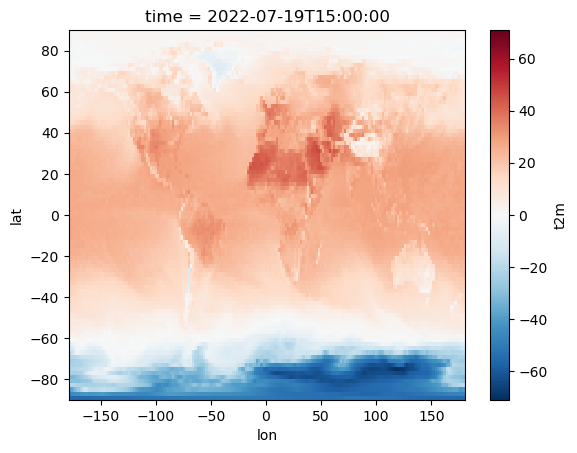

In [10]:
# Plotting the data on the 19-07-2022 at 15:00 hrs
t2m_20220719.plot()

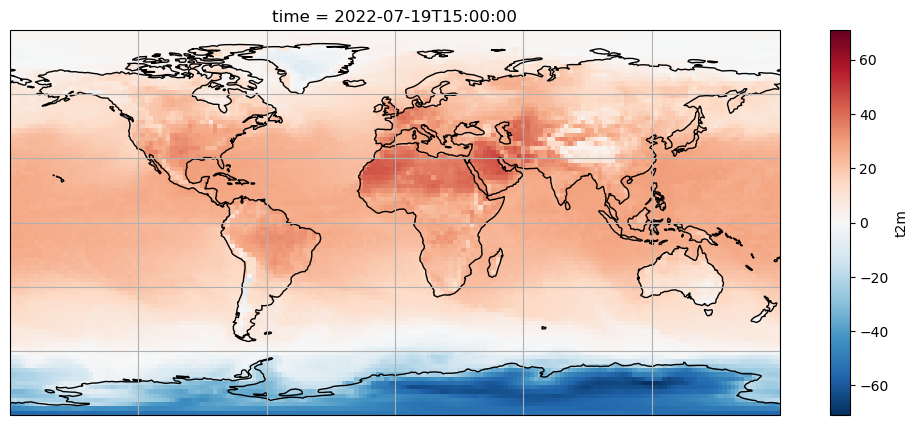

In [ ]:
# fancify your plot with coastlines and geographic gridline from cartopy

fig = plt.figure(figsize=[13, 5])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))  # 1,1,1 specify (nrows, ncols, axnum), here we only want one subplot
t2m_20220719.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/predicates.py:712: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/predicates.py:671: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


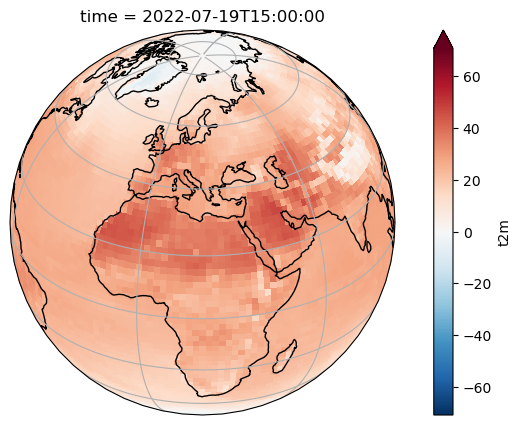

In [20]:
# alternative fancy plot further...
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=20, central_latitude=30))
t2m_20220719.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), extend='max')
ax.coastlines()
ax.gridlines()

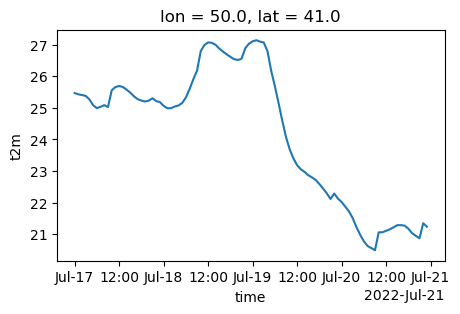

In [26]:
# extract on lon=50 and lat=41 (Point near Freiberg)
# Use the .sel(lon=value, lat=value) function
t2m_series = t2m.sel(lon=50, lat=41)
plt.figure(figsize=[5, 3])
t2m_series.plot()

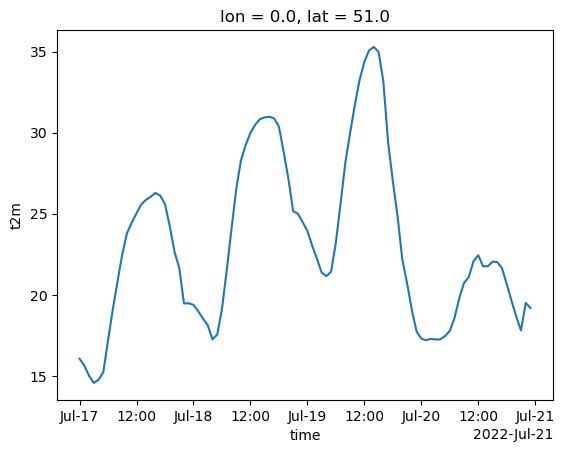

In [27]:
# London 51ºN and -0ºE approximately
t2m_london = t2m.sel(lon =0, lat =51)
t2m_london.plot()

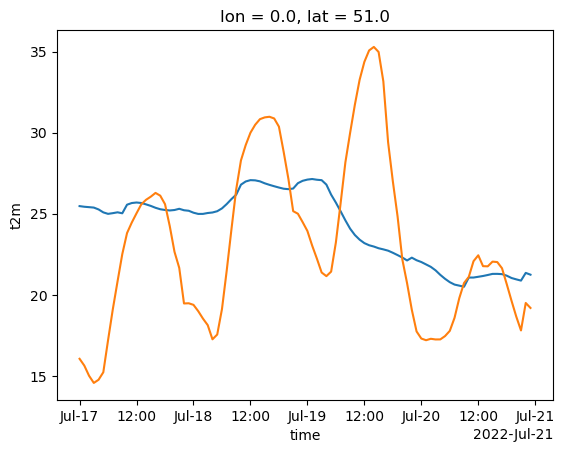

In [28]:
# plotting both timeseries together
t2m_series.plot()
t2m_london.plot()

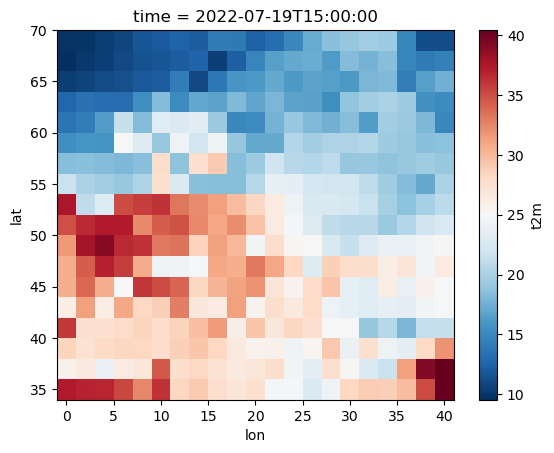

In [29]:
# Crop some spatial data
# Zoom over Europ latitude 35 to 70ºN and longitude 0 to 40ºE
# .sel function DataArray.sel(lat=slice(y1, y2), lon=(x1, x2))
t2m_EU = t2m_20220719.sel(lat=slice(35, 70), lon=slice(0, 40))
t2m_EU.plot(cmap='RdBu_r')

/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


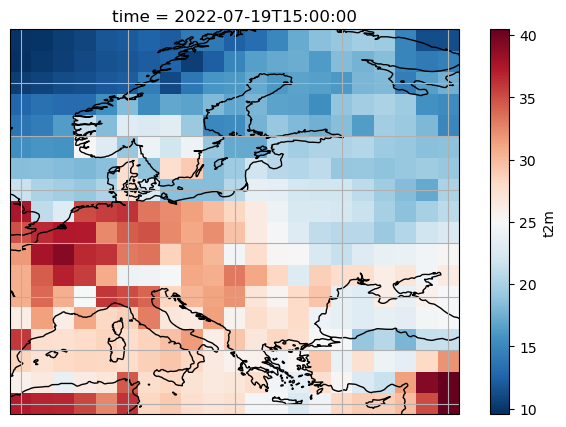

In [34]:
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # 1,1,1 specify (nrows, ncols, axnum), here we only want one subplot
t2m_EU.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.gridlines()

In [69]:
# Exploring the longitude values
t2m_20220719.lon.values

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198., 200., 202., 204., 206., 208., 210., 212., 214., 216., 218.,
       220., 222., 224., 226., 228., 230., 232., 234., 236., 238., 240.,
       242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284.,
       286., 288., 290., 292., 294., 296., 298., 30

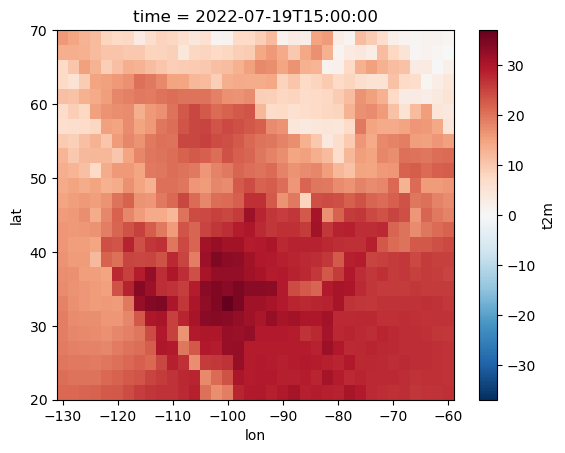

In [35]:
# North America lat = 25 to 70ºN and lon = -120 to -60
t2m_20220719= tools.convert_and_sort_coords(t2m_20220719)
t2m_NA = t2m_20220719.sel(lat =slice(20, 70), lon=slice(-130,-60))
t2m_NA.plot()

/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/climatex/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


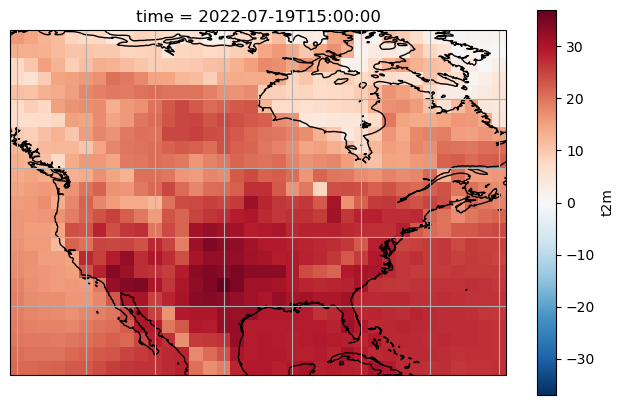

In [36]:
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # 1,1,1 specify (nrows, ncols, axnum), here we only want one subplot
t2m_NA.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.gridlines()

In [14]:
# DataArray(mean)
# Compute the average/mean value
# Mean over the whole area and time
t2m.mean()
print(f"The mean value of the whole dataset is: {t2m.mean().values}ºC")

The mean value of the whole dataset is: 8.5599946975708ºC


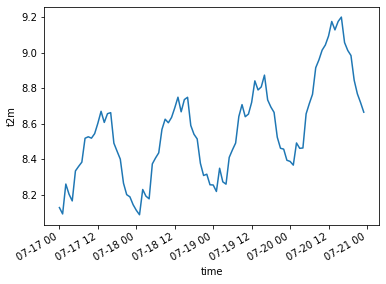

In [85]:
# Computing the mean value along the latitude and longitude dimensions
# Making a time-series plot
t2m.mean(dim=('lat', 'lon')).plot()

In [ ]:
# rolling time= 24 first 24 values averging them 

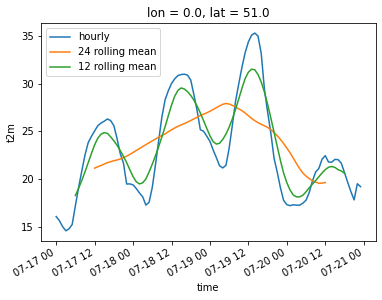

In [93]:
# DataArray.rolling()
t2m_london.plot(label='hourly')
t2m_london.rolling(time = 24, center = True).mean().plot(label='24 rolling mean')
t2m_london.rolling(time = 12, center = True).mean().plot(label='12 rolling mean')
plt.legend()

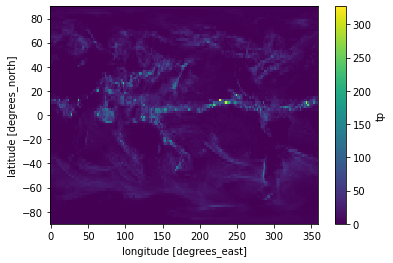

In [98]:
# Extract total precipitation
tp = DS.tp
# Convert to mm
tp = tp * 1000
# Total precipitation of the DataArray
# Apply the DataArray.sum()
tp_sum = tp.sum(dim='time')
tp_sum.plot()

#### Indexing and selecting data

In [8]:
# Select any of the time steps and extract the data
# DataArray.sel(coordinate_name = 'timestep')
t2m_single = t2m.sel(time='2022-07-17T14:00:00.000000000')
t2m_single

<xarray.DataArray 't2m' (lat: 90, lon: 180)>
array([[-64.4783    , -64.36786   , -64.25929   , ..., -64.968735  ,
        -64.7778    , -64.588745  ],
       [-50.94069   , -50.33606   , -49.679016  , ..., -51.608963  ,
        -51.288864  , -51.099792  ],
       [-40.136047  , -37.25145   , -32.884293  , ..., -33.724777  ,
        -35.488113  , -41.51378   ],
       ...,
       [  0.55352783,   0.57974243,   0.60595703, ...,   0.41314697,
          0.46743774,   0.53482056],
       [  0.93167114,   0.92977905,   0.92230225, ...,   0.87176514,
          0.88113403,   0.90545654],
       [  0.7557068 ,   0.7687988 ,   0.78378296, ...,   0.76693726,
          0.7557068 ,   0.7444763 ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2022-07-17T14:00:00
  * lon      (lon) float64 -178.0 -176.0 -174.0 -172.0 ... 176.0 178.0 180.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
Attributes:
    units:      °C
    long_name:  2 metre temperature

* __How many coordinates does the DataArray has?__
* __What's the spatial coverage of the data?__

Extract a time series of the data for the longitude 39ºE and latitude 50.5ºN

In [9]:
t2m_series = t2m.sel(lon=50, lat=41)
t2m_series

<xarray.DataArray 't2m' (time: 96)>
array([25.468597, 25.42929 , 25.404938, 25.378723, 25.264557, 25.082977,
       24.991241, 25.034302, 25.086731, 25.026825, 25.55658 , 25.659515,
       25.691345, 25.661407, 25.577148, 25.48169 , 25.365631, 25.275787,
       25.230865, 25.200897, 25.228973, 25.303864, 25.21402 , 25.18219 ,
       25.062378, 24.987518, 24.98938 , 25.04367 , 25.0755  , 25.154114,
       25.328186, 25.595886, 25.902863, 26.174286, 26.792023, 26.988586,
       27.070923, 27.05783 , 26.996063, 26.876251, 26.780792, 26.694672,
       26.614197, 26.541199, 26.514984, 26.55243 , 26.883759, 27.029755,
       27.104645, 27.140198, 27.095276, 27.069061, 26.795776, 26.176178,
       25.683868, 25.148499, 24.590668, 24.077759, 23.686523, 23.400146,
       23.186737, 23.055695, 22.97522 , 22.870392, 22.801117, 22.720642,
       22.591461, 22.447327, 22.297577, 22.11789 , 22.2901  , 22.130981,
       22.020538, 21.87265 , 21.7229  , 21.50763 , 21.22873 , 20.985382,
       20.777588, 20.6297  , 20.564209, 20.496796, 21.063995, 21.063995,
       21.110779, 21.159454, 21.221222, 21.288635, 21.290497, 21.273651,
       21.178192, 21.03592 , 20.95169 , 20.874939, 21.350403, 21.23996 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2022-07-17 ... 2022-07-20T23:00:00
    lon      float64 50.0
    lat      float64 41.0
Attributes:
    units:      °C
    long_name:  2 metre temperature

* __How many coordinates does the DataArray has now?__

#### Exploratory data visualisation 🌎
Xarray has its own plotting cappabilities.https://docs.xarray.dev/en/latest/user-guide/plotting.html

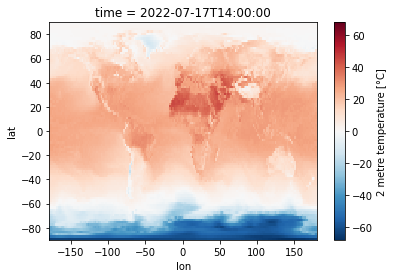

In [10]:
# To plot simply call your Datarray.plot()
t2m_single.plot()

Make a 2D plot for the European region (approximately -20º to 40ºE and 35º to 73ºN) [info 🔍](https://docs.xarray.dev/en/latest/user-guide/indexing.html)
* Use the ```python DataArray.sel``` function
* Use a personalised [colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

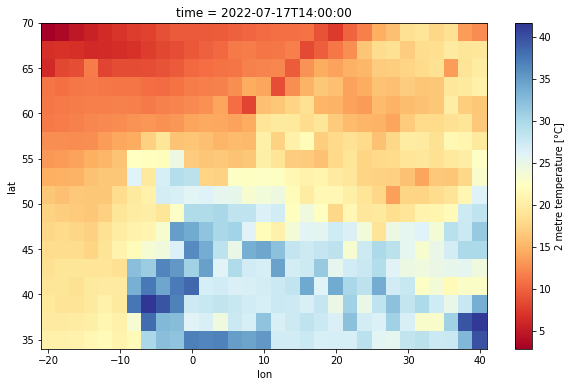

In [11]:
# Slicing the xarray using .sel function 
plt.figure(figsize=(10,6))
t2m_eu = t2m_single.sel(lat=slice(35, 70), lon=slice(-20, 40))
t2m_eu.plot(cmap='RdYlBu') 

    Make a 1D plot (t2m_series) 

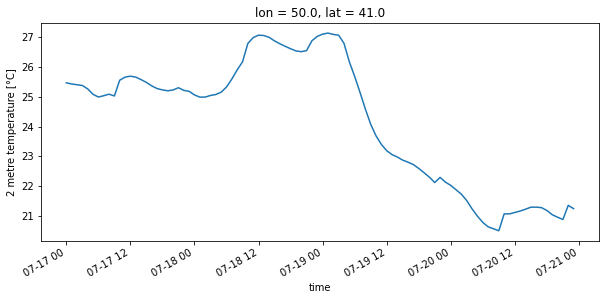

In [12]:
plt.figure(figsize=(10,4))
t2m_series.plot()

#### Practice time 💻
<div style="background-color:lightgreen; padding:10px">
    Plot the timeseries of the t2m variable for 3 different locations.
    <ul>
        <li>The three plots should be combined into a single graph</li>
        <li>Add a different colour to each lineplot</li>
    </ul>
</div>

In [13]:
# Your code goes here

#### Basic statistics, data summarization, aggregation 📊


#### [DataArray.mean()](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.mean.html)

In [14]:
# Computing the mean value across all dimensions (time, lat, lon)
print(f"The t2m variable has {t2m.shape} dimensions")
mean = t2m.mean()
print(f"The mean value is {mean.values}")

The t2m variable has (96, 90, 180) dimensions
The mean value is 8.5599946975708


The mean along the lat and lon dimensions has a (96,) shape


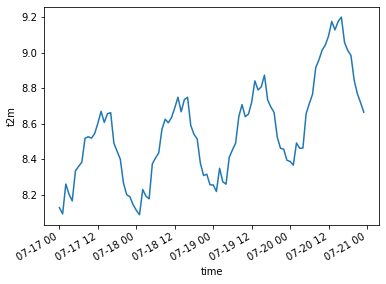

In [15]:
# Comuting the mean value across given dimensions 
mean_1d = t2m.mean(dim=('lat', 'lon'))
print(f"The mean along the lat and lon dimensions has a {mean_1d.shape} shape")
mean_1d.plot()

The mean across the time dimension has a (90, 180) shape


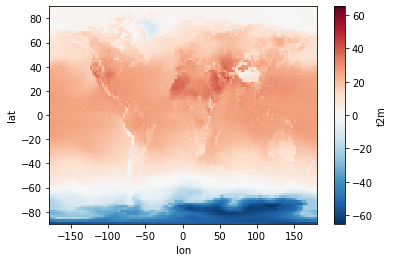

In [16]:
 # Comuting the mean value across given dimensions 
mean_2d = t2m.mean(dim='time')
print(f"The mean across the time dimension has a {mean_2d.shape} shape")
mean_2d.plot()

#### [DataArray.rolling()](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.rolling.html)

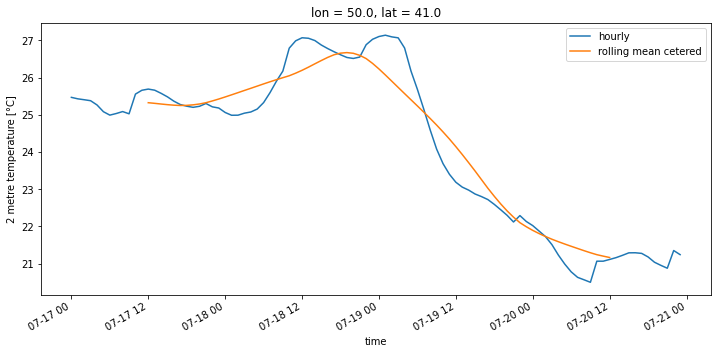

In [17]:
plt.figure(figsize=(12,5))
t2m_series.plot(label='hourly') # Original hourly timeseries
# time = 24 and center = True would take 12 values to the right ands left 
t2m_series.rolling(time = 24, center = True).mean().plot(label='rolling mean cetered')
plt.legend()

#### [DataArray.resample()](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.resample.html)

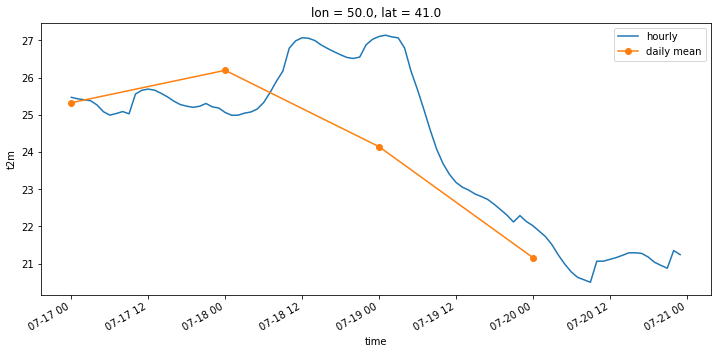

In [28]:
t2m_daily_mean = t2m_series.resample(time='1D').mean()
plt.figure(figsize=(12,5))
t2m_series.plot(label='hourly')
t2m_daily_mean.plot(marker='o',label='daily mean')
plt.legend()

#### [DataArray.sum()](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.sum.html)

In [70]:
# Reading the precipitation "tp" variable
tp = DS.tp # or DS['tp']
print(f"The variable is {tp.attrs.values()}")
# Converting to mm 
tp = tp * 1000
# Computing the total precipitation along the time dimension
tp_sum = tp.sum(dim='time')
print(f"The tp_sum variable has the dimensions {tp_sum.dims} with a shape of {tp_sum.shape}")

The variable is dict_values(['Total precipitation', 'm'])
The variable is dict_values(['Total precipitation', 'm'])
The tp_sum variable has the dimensions ('lat', 'lon') with a shape of (90, 180)


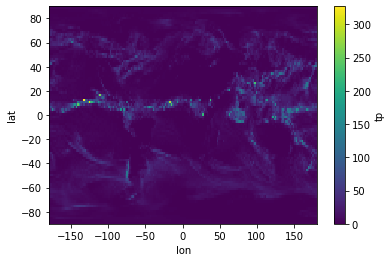

In [71]:
# Plotting the total sum of precipitation 
tp_sum.plot()

#### Practice time 💻
<div style="background-color:lightgreen; padding:10px">
    Plot the hourly and daily behaviour of temperature and precipitation over a given lat and lon point.
    <ul>
        <li>Extract the t2m and tp over a single lat, lon point</li>
        <li>Plot the hourly timeseries of the t2m and tp of the selected point</li>
        <li>Compute the daily mean of t2m and the daily accumulated rainfall of tp of the selected point</li>
        <li>Plot the daily mean of t2m and daily rainfall of  variable tp</li>
        <li>Add appropiate labels</li>        
    </ul>
</div>

In [ ]:
# Your code goes here